In [1]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.model_selection import train_test_split
from sklearn import metrics

import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('fake_or_real_news.csv')


In [3]:
df.shape

(10240, 2)

In [4]:
df.head()

,Statement,Label
0,Says the Annies List political group supports ...,0
1,When did the decline of coal start? It started...,1
2,"Hillary Clinton agrees with John McCain ""by vo...",1
3,Health care reform legislation is likely to ma...,0
4,The economic turnaround started at the end of ...,1


In [5]:
df.head()

,Statement,Label
0,Says the Annies List political group supports ...,0
1,When did the decline of coal start? It started...,1
2,"Hillary Clinton agrees with John McCain ""by vo...",1
3,Health care reform legislation is likely to ma...,0
4,The economic turnaround started at the end of ...,1


In [6]:
y = df.Label

In [7]:
df = df.drop('Label', axis=1)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(df['Statement'],y,test_size = 0.33, random_state =53)

In [9]:
count_vectorizer = CountVectorizer(stop_words='english')
count_train = count_vectorizer.fit_transform(X_train)
count_test = count_vectorizer.transform(X_test)

In [10]:
count_vectorizer.get_feature_names()[:10]

['00', '000', '000new', '014', '02', '024', '029', '036', '04', '05']

In [11]:
count_df = pd.DataFrame(count_train.A, columns = count_vectorizer.get_feature_names())

In [12]:
count_df.head()

,00,000,000new,014,02,024,029,036,04,05,050,054th,06,075,08,081,09,092,10,100,100th,102,103,105,107,1070,108,109,10th,11,110,11023,111th,112,112th,113,114,115,11900,11s,...,yesterday,yesteryear,yohoattempts,york,yorkers,yorks,yost,youd,yougov,youll,young,younger,youngstown,youre,yous,youth,youtube,youve,yucca,yuma,yuri,zack,zandi,zanesville,zappala,zawahiri,zeldin,zell,zenzinger,zephyr,zero,zika,zip,zippo,zombie,zombies,zone,zones,zoning,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [13]:
model = MultinomialNB()

In [14]:
model.fit(count_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [15]:
prediction = model.predict(count_test)
score = metrics.accuracy_score(y_test,prediction)
print("Accuracy: %0.3f" % score)

Accuracy: 0.593


In [27]:
def plot_confusion_matrix(cm, classes,
                          normalize = False,
                          title = 'Confusion Matrix',
                          cmap = plt.cm.Blues):
  plt.imshow(cm, interpolation='nearest',cmap = cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks,['FAKE','REAL'])
  plt.yticks(tick_marks,['FAKE','REAL'])

  if normalize:
    cm = cm.astype('float') / cm.sum(axis = 1) [:,np.newaxis]
    print("Normalized Confusion Matrix")

  else:
    print("Confusion Matrix without Normalized\n")

  thresh = cm.max() / 2
  for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i,j],
             horizontalalignment = "center",
             color = "white" if cm[i, j] > thresh else "black")
    
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')

Confusion Matrix without Normalized



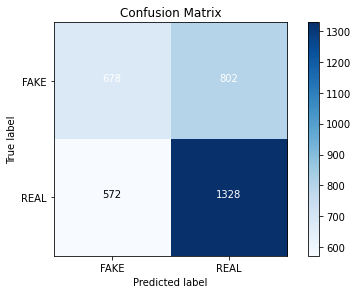

In [28]:
cm = metrics.confusion_matrix(y_test,prediction,labels=[0,1])
plot_confusion_matrix(cm, classes= [0,1])